In [1]:
# import modules

import numpy as np
import xarray as xr
import os
import matplotlib.pyplot as plt
import warnings

os.chdir("/Users/etmu9498/research/code/scripts")
import make_plots_new_heights
import tc_metadata
import helper_fns
os.chdir("/Users/etmu9498/research/code/scripts/in-situ-scripts")
import in_situ_colorbar_lines
import sys
sys.path.append("/Users/etmu9498/research/code/scripts/plotting/")
import simple_flight_level_plot

In [2]:
### Helper functions 1 through 3 used to make this plot: plotting crl power

def plot_power_ch1( data_path, data_file):
    warnings.filterwarnings("ignore")
    # get data
    os.chdir( data_path)
    crl_data = xr.open_dataset( data_file)

    
    # choose x axis
    xaxis = crl_data.in_situ_distance
    # plot things
    plt.pcolormesh(  xaxis, - crl_data.H_new, crl_data.power_new.transpose(), vmin = -30, vmax =-10)
    
    
    '''
    # this is how to plot crl data using tdr scale! indicese were off by one in 2nd line
    xaxis = crl_data.tdr_distance
    plt.pcolormesh(  xaxis, - crl_data.H_new, crl_data.power_new.transpose()[:, 0:-1], vmin = -30, vmax =-10)
    '''
    
    plt.ylabel( 'Height (km)')    
    cbar = plt.colorbar()
    cbar.ax.set_ylabel( ylabel="CRL Return Power (dBz)", fontsize=20)
    cbar.ax.tick_params(labelsize=20)
    plt.grid( 'on')
    ax = plt.gca()
    ax.set_facecolor('k')
    warnings.filterwarnings("default")
    

def plot_T( data_path, data_file):
    warnings.filterwarnings("ignore")
    # get data
    os.chdir( data_path)
    new_crl = xr.open_dataset( data_file)
    color_map = plt.cm.get_cmap( "RdYlBu").reversed()

    # choose x axis with helper script
    xaxis = crl_data.in_situ_distance

    plt.pcolormesh( xaxis, - new_crl.H_new, new_crl.T_new.transpose(), cmap = color_map, vmin=5, vmax=30 )
    cbar = plt.colorbar()
    cbar.ax.set_ylabel( ylabel="CRL Temperature ( C)", fontsize=20)
    cbar.ax.tick_params(labelsize=20)

    plt.ylabel( 'Height (km)')
    plt.grid( 'on')
    ax = plt.gca()
    ax.set_facecolor('k')
    warnings.filterwarnings("default")


def plot_wvmr(data_path, data_file):
    # get data
    os.chdir( data_path)
    crl_data = xr.open_dataset( data_file)

    # choose x axis with helper script
    xaxis = crl_data.in_situ_distance

    # plot things
    plt.pcolormesh( xaxis, - crl_data.H_new, crl_data.wvmr_new.transpose(), vmin = 7.5, vmax =20)
    cbar = plt.colorbar()
    cbar.ax.set_ylabel( ylabel="CRL WVMR (g/Kg)", fontsize=20)
    cbar.ax.tick_params(labelsize=20)
    plt.ylabel( 'Height (km)')
    plt.grid( 'on')
    ax = plt.gca()
    ax.set_facecolor('k')


In [3]:
def plot_tdr( tdr_path, tdr_name):
    warnings.filterwarnings("ignore")

    # get data
    os.chdir( tdr_path)
    tdr_data = xr.open_dataset( tdr_name)

    xaxis = tdr_data.distance
    
    # make plot
    color_map = plt.cm.get_cmap( "RdYlBu").reversed()

    # plot data
    # get rid of nans and resize array to get rid of overlapping data
    # also, no need to use .transpose() because that was already done when making the datasets!
    reflectivity = tdr_data.REFLECTIVITY[ :, 0:len( xaxis)]
    # refl = tdr_data.REFLECTIVITY[:, lat_no_nan_ind] # another way?
    plt.pcolormesh( xaxis, tdr_data.height, reflectivity, cmap = color_map, vmin = -10, vmax = 50 )

    # making things prettier
    cbar = plt.colorbar( )
    cbar.ax.set_ylabel( ylabel="TDR Reflectivity (dBZ)", fontsize=20)
    cbar.ax.tick_params(labelsize=20)
    
    plt.ylabel( 'Height (Km)')
    plt.grid( 'on')
    warnings.filterwarnings("default")


In [11]:
tcname = 'sam'
metadata = tc_metadata.all_data( tcname)
dataset = 6
padding = 200 # amount of space on each side of tc center

# get the correct name of this day's dataset
crl_path = "/Users/etmu9498/research/data/crl-new-matrices"
tdr_path = "/Users/etmu9498/research/data/tdr-new"
tdr_name, crl_name = tc_metadata.choose_new_data( tcname, dataset)

# load data
os.chdir( crl_path)
crl_data = xr.open_dataset( crl_name)

tdr plot added
crl power plot added
crl temp plot added
crl water vapor plot added


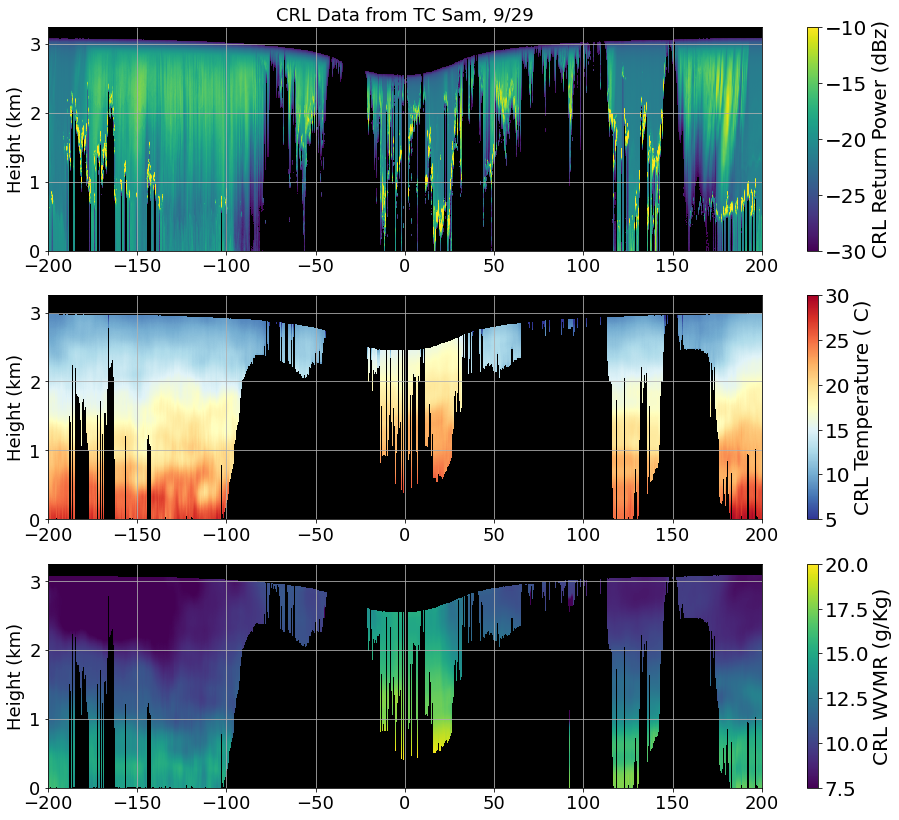

In [12]:
# crl figure

# initialize figure
warnings.filterwarnings("ignore")

fig1 = plt.subplots(3, 1, figsize=(16, 14)) # , facecolor='w')
helper_fns.change_font_sizes(small=18, medium=18)

print('tdr plot added')

# plot crl power with in situ distance axis
plt.subplot(311)
plt.title("CRL Data from TC Sam, 9/29")

plot_power_ch1(crl_path, crl_name) # use this local function, not the one found in make_plots_new_heights
plt.xlim( [ - padding, padding])
# plt.title( "Compact Raman Lidar (CRL) Data", loc='center')
plt.ylim( [ 0, crl_data.H_max + .1])

print( 'crl power plot added')


# plot crl temp with in situ distance axis
plt.subplot(312)
plot_T(crl_path, crl_name) # use this local function, not the one found in make_plots_new_heights
plt.xlim( [ - padding, padding])
# plt.title( "Compact Raman Lidar (CRL) Data", loc='center')
plt.ylim( [ 0, crl_data.H_max + .1])

print( 'crl temp plot added')


# plot crl wv with in situ distance axis
plt.subplot(313)
plot_wvmr( crl_path, crl_name) # use this local function, not the one found in make_plots_new_heights
plt.xlim( [ - padding, padding])
# plt.title( "Compact Raman Lidar (CRL) Data", loc='center')
plt.ylim( [ 0, crl_data.H_max + .1])

print( 'crl water vapor plot added')

(-200.0, 200.0)

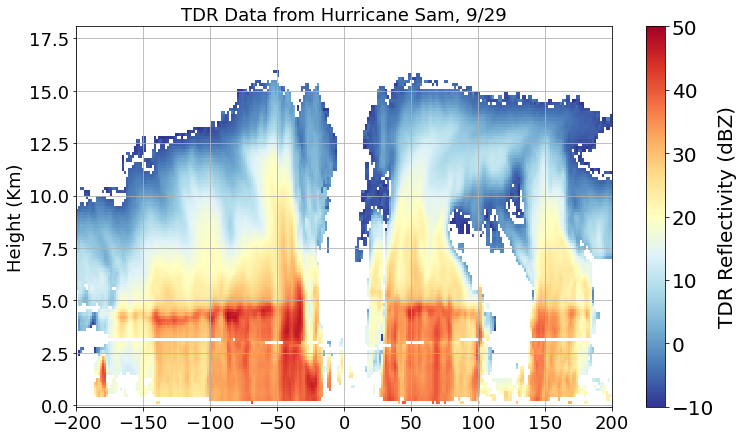

In [14]:
# create tdr plot
fig1 = plt.subplots(1, 1, figsize=(12, 7)) # , facecolor='w')
helper_fns.change_font_sizes(small=18, medium=18)

plt.title( "TDR Data from Hurricane Sam, 9/29", loc='center')
# plt.title( "Tail Doppler Radar (TDR) Data", loc='center')
plot_tdr( tdr_path, tdr_name)
plt.xlim( [ - padding, padding])

